In [176]:
# Imports

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import itertools
import seaborn as sns

from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression, PLSSVD

from scipy.stats import uniform as sp_rand

# Importing tqdm for the progress bar
from tqdm import tnrange, tqdm_notebook

In [2]:
# Load data

# data_in = pd.read_csv("Credit.csv", usecols=list(range(1,12)))

data_in = pd.read_csv("Hitters.csv")

# data_in.rename(columns={data_in.columns[0]:'Seq_no'}, inplace=True)

# data_in.drop(columns=['Seq_no'], inplace=True)

# Remove missing value
# data_in = data_in.loc[ data_in['horsepower'] != '?' ]

# Change datatype
# data_in['horsepower'] = data_in['horsepower'].astype('int64')

data_in.shape
data_in.dtypes
data_in.head()
data_in.tail()

(322, 21)

Name          object
AtBat          int64
Hits           int64
HmRun          int64
Runs           int64
RBI            int64
Walks          int64
Years          int64
CAtBat         int64
CHits          int64
CHmRun         int64
CRuns          int64
CRBI           int64
CWalks         int64
League        object
Division      object
PutOuts        int64
Assists        int64
Errors         int64
Salary       float64
NewLeague     object
dtype: object

,Name,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


,Name,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
317,-Willie McGee,497,127,7,65,48,37,5,2703,806,...,379,311,138,N,E,325,9,3,700.0,N
318,-Willie Randolph,492,136,5,76,50,94,12,5511,1511,...,897,451,875,A,E,313,381,20,875.0,A
319,-Wayne Tolleson,475,126,3,61,43,52,6,1700,433,...,217,93,146,A,W,37,113,7,385.0,A
320,-Willie Upshaw,573,144,9,85,60,78,8,3198,857,...,470,420,332,A,E,1314,131,12,960.0,A
321,-Willie Wilson,631,170,9,77,44,31,11,4908,1457,...,775,357,249,A,W,408,4,3,1000.0,A


In [3]:
data_in.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [4]:
data_clean = data_in.dropna()

data_clean.shape
data_clean.head()

(263, 21)

,Name,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.0,A


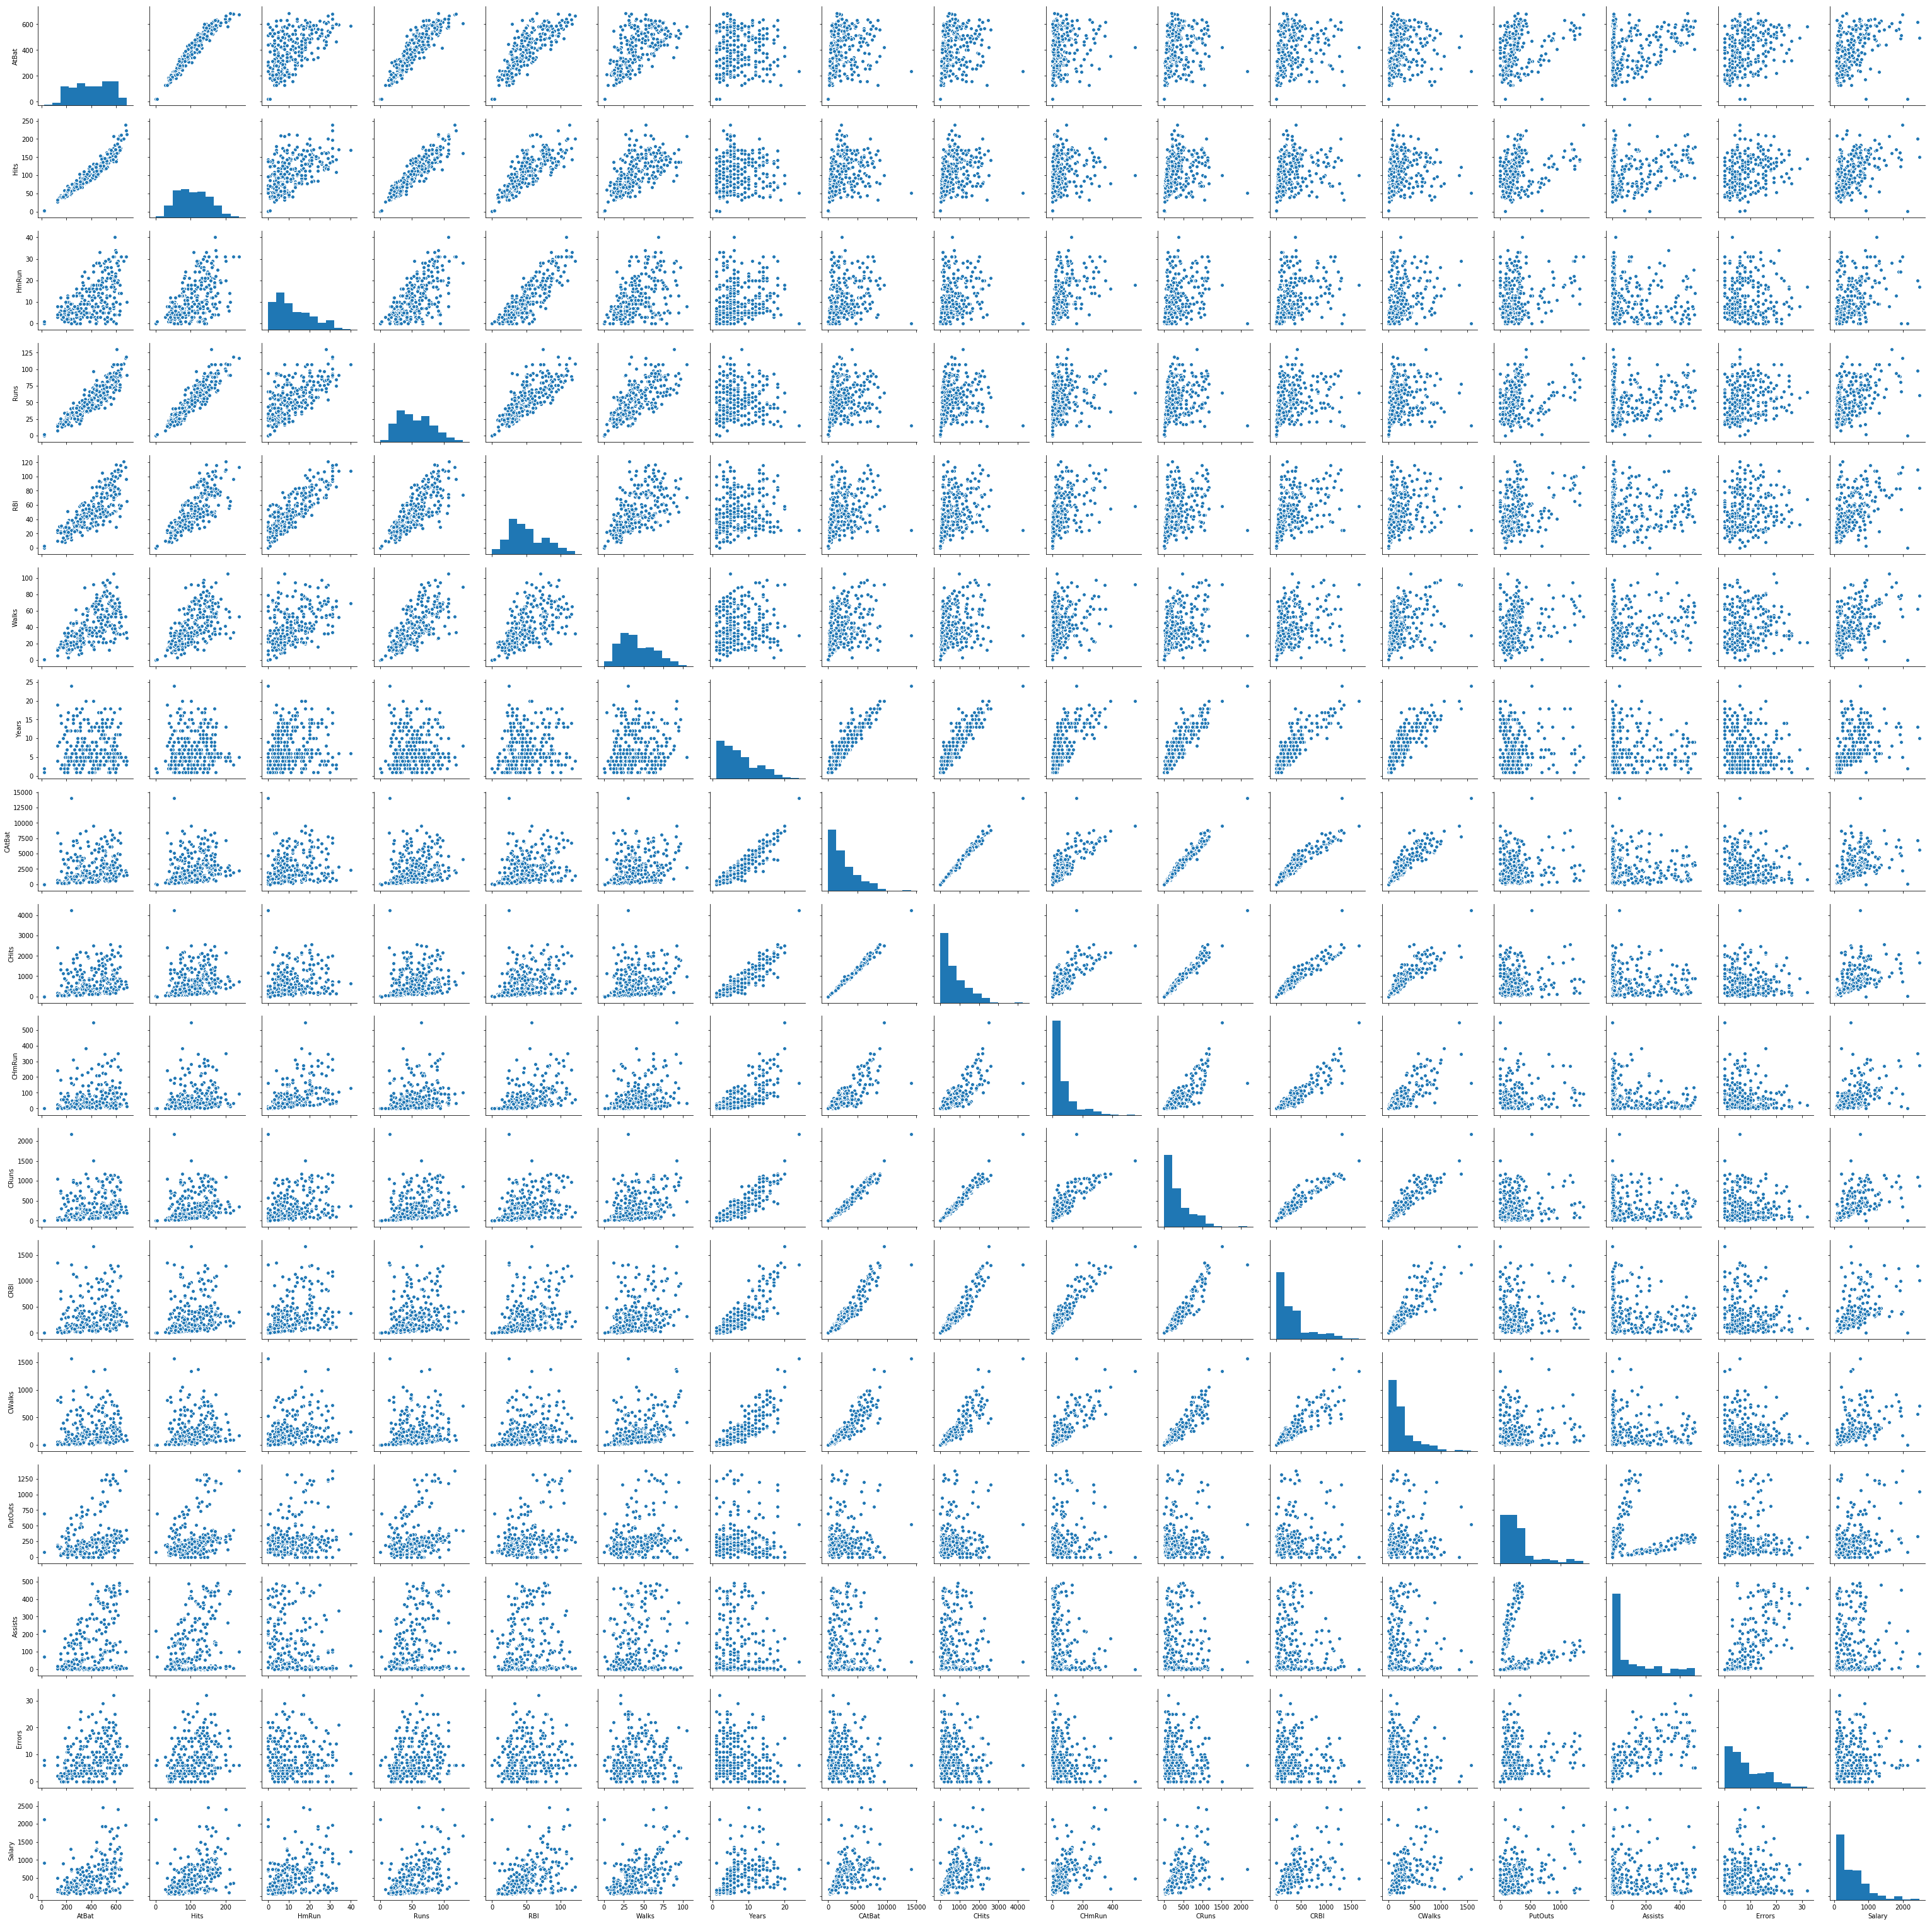

In [5]:
# Pair plots

sns.pairplot(data_clean.drop('Name', axis=1))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f68c42a2e10>,
      dtype=object)

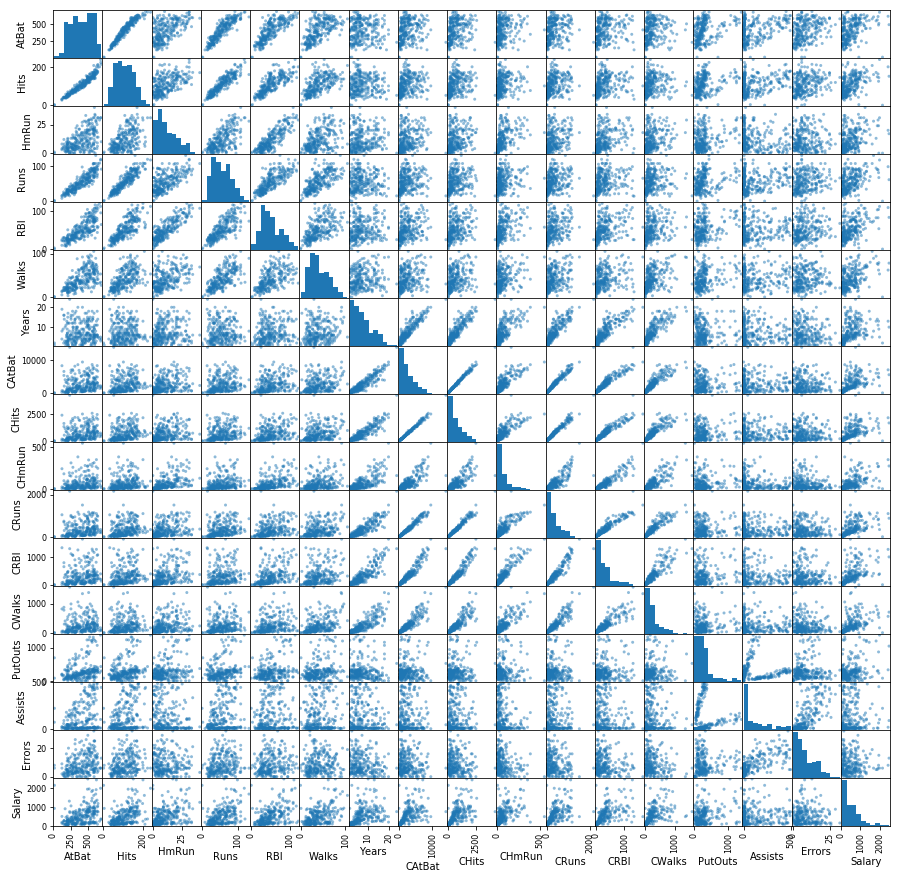

In [6]:
pd.plotting.scatter_matrix(data_clean, figsize=[15, 15])

## Ridge Regression

In [146]:
# Define X and Y datasets

Y = data_clean.Salary

# feature_names = ['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 
#                 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors']
# X = data_clean[feature_names]

dummies = pd.get_dummies(data_clean[['League', 'Division', 'NewLeague']])

# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X_ = data_clean.drop(['Name', 'Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

# Define the feature set X.
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X.head()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Text(0.5,0,'Coefficient Index')

Text(0,0.5,'Coefficient Magnitude')

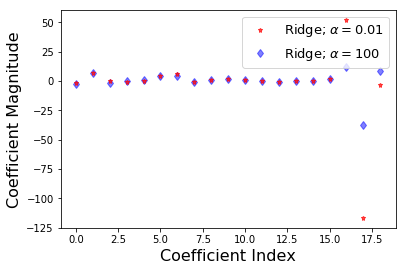

In [147]:
# Higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles

rr = Ridge(alpha=0.01)
rr.fit(X_train, Y_train)
ridge_train_score = rr.score(X_train, Y_train)

rr100 = Ridge(alpha=100)
rr100.fit(X_train, Y_train)
ridge100_train_score = rr100.score(X_train, Y_train)

plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=1)
plt.show()

In [155]:
# Linear Regression, for comparison

clf = linear_model.LinearRegression()
clf.fit(X_train, Y_train)
reg_train_score = clf.score(X_train, Y_train)

print("Linear Regression Score = ", reg_train_score)
print('\nIntercept: ', clf.intercept_)
print('Coefficients: ')
coef_df = pd.DataFrame()
coef_df['Feature'] = X.columns
coef_df['Coefficients'] = clf.coef_
print(coef_df)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Linear Regression Score =  0.565158094333106

Intercept:  156.66310964409917
Coefficients: 
        Feature  Coefficients
0         AtBat     -1.876566
1          Hits      6.589515
2         HmRun      0.254613
3          Runs     -0.445740
4           RBI      0.038896
5         Walks      4.562839
6         Years      6.146329
7        CAtBat     -0.356370
8         CHits      0.989676
9        CHmRun      1.590335
10        CRuns      0.765803
11         CRBI      0.267375
12       CWalks     -0.445449
13      PutOuts      0.287136
14      Assists      0.142581
15       Errors      1.654931
16     League_N     51.957325
17   Division_W   -116.575264
18  NewLeague_N     -3.259057


In [156]:
# Function for Ridge Regression with a specific parameter

def ridge_regression_fn(X_train, Y_train, X_test, Y_test, alpha):

    clf = Ridge(alpha=alpha)
#    clf = Ridge(alpha = alpha, fit_intercept = True, normalize = True)
    clf.fit(X_train, Y_train)
    ridge_train_score = clf.score(X_train, Y_train)

    print("Ridge Regression Training Score = ", ridge_train_score)
    print('\nIntercept: ', clf.intercept_)
    print('Coefficients: ')
    coef_df = pd.DataFrame()
    coef_df['Feature'] = X.columns
    coef_df['Coefficients'] = clf.coef_
    print(coef_df)

    # MSE on training set
    Y_train_pred = clf.predict(X_train)
    print("\nMean squared error on Training set = %.2f" % mean_squared_error(Y_train, Y_train_pred))

    # Predict on test set
    Y_pred = clf.predict(X_test)
    print("\nMean squared error on Test set = %.2f" % mean_squared_error(Y_test, Y_pred))
    
# Run function with alpha=0, i.e. no regularisation
ridge_regression_fn(X_train, Y_train, X_test, Y_test, 0)

Ridge Regression Training Score =  0.565158094333106

Intercept:  156.66310964409382
Coefficients: 
        Feature  Coefficients
0         AtBat     -1.876566
1          Hits      6.589515
2         HmRun      0.254613
3          Runs     -0.445740
4           RBI      0.038896
5         Walks      4.562839
6         Years      6.146329
7        CAtBat     -0.356370
8         CHits      0.989676
9        CHmRun      1.590335
10        CRuns      0.765803
11         CRBI      0.267375
12       CWalks     -0.445449
13      PutOuts      0.287136
14      Assists      0.142581
15       Errors      1.654931
16     League_N     51.957325
17   Division_W   -116.575264
18  NewLeague_N     -3.259057

Mean squared error on Training set = 85259.77

Mean squared error on Test set = 133595.03


In [157]:
ridge_regression_fn(X_train, Y_train, X_test, Y_test, 11498)

Ridge Regression Training Score =  0.5417502028352468

Intercept:  137.3890791174614
Coefficients: 
        Feature  Coefficients
0         AtBat     -1.315451
1          Hits      4.178307
2         HmRun     -0.510049
3          Runs      1.068378
4           RBI      0.646892
5         Walks      2.757759
6         Years      0.263807
7        CAtBat     -0.393103
8         CHits      1.126763
9        CHmRun      1.198494
10        CRuns      0.684935
11         CRBI      0.364044
12       CWalks     -0.247751
13      PutOuts      0.313912
14      Assists      0.197309
15       Errors      0.260175
16     League_N      0.184573
17   Division_W     -0.509323
18  NewLeague_N      0.147216

Mean squared error on Training set = 89849.38

Mean squared error on Test set = 137531.81


In [158]:
ridge_regression_fn(X_train, Y_train, X_test, Y_test, 1)

Ridge Regression Training Score =  0.5651464754821338

Intercept:  156.05593497687636
Coefficients: 
        Feature  Coefficients
0         AtBat     -1.884388
1          Hits      6.609780
2         HmRun      0.220732
3          Runs     -0.448352
4           RBI      0.062462
5         Walks      4.556904
6         Years      6.115107
7        CAtBat     -0.355458
8         CHits      0.985194
9        CHmRun      1.587694
10        CRuns      0.768870
11         CRBI      0.267224
12       CWalks     -0.444694
13      PutOuts      0.287491
14      Assists      0.142953
15       Errors      1.674333
16     League_N     47.577128
17   Division_W   -114.195844
18  NewLeague_N      0.471988

Mean squared error on Training set = 85262.05

Mean squared error on Test set = 133584.21


### Grid Search to tune lambda parameter

In [159]:
# prepare a range of alpha values to test
alphas = np.array([0, 0.1, 1, 10e1, 10e2, 10e3, 10e4, 10e5, 10e6, 10e7, 10e8, 10e8, 10e9])

# create and fit a ridge regression model, testing each alpha
model = Ridge(fit_intercept = True)
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas), cv=10)
grid.fit(X_train, Y_train)
print("Grid = ", grid)

# summarize the results of the grid search
print("\nBest Score = ", grid.best_score_)
print("\n Best Estimator = ", grid.best_estimator_.alpha)

GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([0.e+00, 1.e-01, 1.e+00, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06,
       1.e+07, 1.e+08, 1.e+09, 1.e+09, 1.e+10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Grid =  GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([0.e+00, 1.e-01, 1.e+00, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06,
       1.e+07, 1.e+08, 1.e+09, 1.e+09, 1.e+10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Best Score =  0.349826069581979

 Best Estimator =  1000000.0


In [161]:
# Calculate Test MSE using best model

ridge_regression_fn(X_train, Y_train, X_test, Y_test, 1000000.0)

Ridge Regression Training Score =  0.49088150734512165

Intercept:  52.34101609317764
Coefficients: 
        Feature  Coefficients
0         AtBat      0.368806
1          Hits      0.296821
2         HmRun      0.019030
3          Runs      0.169452
4           RBI      0.117830
5         Walks      0.172086
6         Years     -0.005579
7        CAtBat     -0.235486
8         CHits      0.613265
9        CHmRun      0.207988
10        CRuns      0.470062
11         CRBI      0.506983
12       CWalks      0.049526
13      PutOuts      0.323570
14      Assists      0.009340
15       Errors      0.002248
16     League_N      0.001567
17   Division_W     -0.006833
18  NewLeague_N      0.001396

Mean squared error on Training set = 99823.24

Mean squared error on Test set = 141473.29


### Random Search method

In [162]:
# prepare a uniform distribution to sample for the alpha parameter
param_grid = {'alpha': sp_rand()}

# create and fit a ridge regression model, testing random alpha values
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100)
rsearch.fit(X_train, Y_train)
print("Random Search = ", rsearch)

# summarize the results of the random parameter search
print("\nBest Score = ", rsearch.best_score_)
print("\n Best Estimator = ", rsearch.best_estimator_.alpha)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
          fit_params=None, iid=True, n_iter=100, n_jobs=1,
          param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f68b1560550>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

Random Search =  RandomizedSearchCV(cv=None, error_score='raise',
          estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
          fit_params=None, iid=True, n_iter=100, n_jobs=1,
          param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f68b1560550>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

Best Score =  0.43841841468679466

 Best Estimator =  0.9976668169425242


In [163]:
# Calculate Test MSE using best model

ridge_regression_fn(X_train, Y_train, X_test, Y_test, 0.997)

Ridge Regression Training Score =  0.5651465401987447

Intercept:  156.0577240609815
Coefficients: 
        Feature  Coefficients
0         AtBat     -1.884365
1          Hits      6.609725
2         HmRun      0.220841
3          Runs     -0.448351
4           RBI      0.062390
5         Walks      4.556922
6         Years      6.115205
7        CAtBat     -0.355460
8         CHits      0.985206
9        CHmRun      1.587699
10        CRuns      0.768861
11         CRBI      0.267226
12       CWalks     -0.444696
13      PutOuts      0.287490
14      Assists      0.142952
15       Errors      1.674282
16     League_N     47.588441
17   Division_W   -114.202851
18  NewLeague_N      0.462591

Mean squared error on Training set = 85262.04

Mean squared error on Test set = 133584.24


# Lasso

In [165]:
def lasso_fn(X_train, Y_train, X_test, Y_test, alpha):

    clf = linear_model.Lasso(alpha=alpha)
    clf.fit(X_train, Y_train)
    train_score = clf.score(X_train, Y_train)

    print("Lasso Training Score = ", train_score)
    print('\nIntercept: ', clf.intercept_)
    print('Coefficients: ')
    coef_df = pd.DataFrame()
    coef_df['Feature'] = X.columns
    coef_df['Coefficients'] = clf.coef_
    print(coef_df)

    # MSE on training set
    Y_train_pred = clf.predict(X_train)
    print("\nMean squared error on Training set = %.2f" % mean_squared_error(Y_train, Y_train_pred))

    # Predict on test set
    Y_pred = clf.predict(X_test)
    print("\nMean squared error on Test set = %.2f" % mean_squared_error(Y_test, Y_pred))
    
# Run function with alpha=0, i.e. no regularisation
lasso_fn(X_train, Y_train, X_test, Y_test, 0)

Lasso Training Score =  0.565157595221103

Intercept:  156.5137146202544
Coefficients: 
        Feature  Coefficients
0         AtBat     -1.872141
1          Hits      6.570448
2         HmRun      0.237923
3          Runs     -0.430059
4           RBI      0.041512
5         Walks      4.553996
6         Years      6.226352
7        CAtBat     -0.358478
8         CHits      0.999682
9        CHmRun      1.604901
10        CRuns      0.759810
11         CRBI      0.262139
12       CWalks     -0.442840
13      PutOuts      0.287002
14      Assists      0.142932
15       Errors      1.649305
16     League_N     52.086834
17   Division_W   -116.592442
18  NewLeague_N     -3.353905

Mean squared error on Training set = 85259.87

Mean squared error on Test set = 133704.51


/home/stuart/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  after removing the cwd from sys.path.
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [166]:
lasso_fn(X_train, Y_train, X_test, Y_test, 10000) 

Lasso Training Score =  0.38855843356812214

Intercept:  105.92449136972266
Coefficients: 
        Feature  Coefficients
0         AtBat      0.252154
1          Hits      0.000000
2         HmRun      0.000000
3          Runs      0.000000
4           RBI      0.000000
5         Walks      0.000000
6         Years     -0.000000
7        CAtBat      0.072507
8         CHits      0.000000
9        CHmRun      0.000000
10        CRuns      0.000000
11         CRBI      0.107880
12       CWalks      0.000000
13      PutOuts      0.327925
14      Assists     -0.000000
15       Errors      0.000000
16     League_N     -0.000000
17   Division_W     -0.000000
18  NewLeague_N      0.000000

Mean squared error on Training set = 119885.80

Mean squared error on Test set = 147089.27


In [167]:
### Grid Search for Lasso

# prepare a range of alpha values to test
alphas = np.array([0, 0.1, 1, 10e1, 10e2, 10e3, 10e4, 10e5, 10e6, 10e7, 10e8, 10e8, 10e9])

# create and fit a ridge regression model, testing each alpha
model = linear_model.Lasso()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas), cv=10)
grid.fit(X_train, Y_train)
print("Grid = ", grid)

# summarize the results of the grid search
print("\nBest Score = ", grid.best_score_)
print("\n Best Estimator = ", grid.best_estimator_.alpha)

/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_

/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


GridSearchCV(cv=10, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([0.e+00, 1.e-01, 1.e+00, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06,
       1.e+07, 1.e+08, 1.e+09, 1.e+09, 1.e+10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Grid =  GridSearchCV(cv=10, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([0.e+00, 1.e-01, 1.e+00, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06,
       1.e+07, 1.e+08, 1.e+09, 1.e+09, 1.e+10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Best Score =  0.34704512578602287

 Best Estimator =  1.0


In [168]:
# Calculate Test MSE using best model

lasso_fn(X_train, Y_train, X_test, Y_test, 1)

Lasso Training Score =  0.5651030493423708

Intercept:  159.46289924240688
Coefficients: 
        Feature  Coefficients
0         AtBat     -1.886903
1          Hits      6.571265
2         HmRun      0.021658
3          Runs     -0.388403
4           RBI      0.129709
5         Walks      4.531295
6         Years      5.616392
7        CAtBat     -0.354345
8         CHits      0.993020
9        CHmRun      1.603385
10        CRuns      0.752694
11         CRBI      0.259485
12       CWalks     -0.439582
13      PutOuts      0.288831
14      Assists      0.144334
15       Errors      1.629944
16     League_N     44.259319
17   Division_W   -112.051341
18  NewLeague_N      0.000000

Mean squared error on Training set = 85270.57

Mean squared error on Test set = 133493.75


/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


# Principal Components Regression

In [171]:
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

pd.DataFrame(pca.components_.T).loc[:4,:5]

,0,1,2,3,4,5
0,0.198290,-0.383784,0.088626,0.031967,0.028117,-0.070646
1,0.195861,-0.377271,0.074032,0.017982,-0.004652,-0.082240
2,0.204369,-0.237136,-0.216186,-0.235831,0.077660,-0.149646
3,0.198337,-0.377721,-0.017166,-0.049942,-0.038536,-0.136660
4,0.235174,-0.314531,-0.073085,-0.138985,0.024299,-0.111675


/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


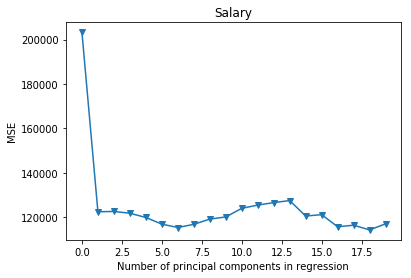

In [181]:
# 10-fold CV, with shuffle
n = len(X_reduced)
kf_10 = KFold(n_splits=10, shuffle=True, random_state=1)
regr = linear_model.LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*cross_val_score(regr, np.ones((n,1)), Y.ravel(), cv=kf_10, scoring='mean_squared_error').mean()
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*cross_val_score(regr, X_reduced[:,:i], Y.ravel(), cv=kf_10, scoring='mean_squared_error').mean()
    mse.append(score)

# Plot results
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1)

In [182]:
# Variance explained

np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([38.31, 60.15, 70.84, 79.03, 84.29, 88.63, 92.26, 94.96, 96.28,
       97.25, 97.97, 98.64, 99.14, 99.46, 99.73, 99.88, 99.95, 99.98,
       99.99])

/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


Text(0.5,0,'Number of principal components in regression')

Text(0,0.5,'MSE')

Text(0.5,1,'Salary')

(-1, 19.95)

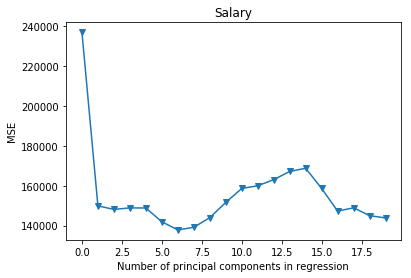

In [187]:
pca2 = PCA()

# Split into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=1)

# Scale the data
X_reduced_train = pca2.fit_transform(scale(X_train))
n = len(X_reduced_train)

# 10-fold CV, with shuffle
kf_10 = KFold(n_splits=10, shuffle=True, random_state=1)
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*cross_val_score(regr, np.ones((n,1)), y_train.ravel(), cv=kf_10, scoring='mean_squared_error').mean()
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*cross_val_score(regr, X_reduced_train[:,:i], y_train.ravel(), cv=kf_10, scoring='mean_squared_error').mean()
    mse.append(score)

plt.plot(np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1)

In [188]:
# Performance on test set
X_reduced_test = pca2.transform(scale(X_test))[:,:7]

# Train regression model on training data
regr = linear_model.LinearRegression()
regr.fit(X_reduced_train[:,:7], y_train)

# Prediction with test data
pred = regr.predict(X_reduced_test)
mean_squared_error(y_test, pred)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

111994.42273636986

# Partial Least Squares Regression

/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


Text(0.5,0,'Number of principal components in regression')

Text(0,0.5,'MSE')

Text(0.5,1,'Salary')

(-1, 19.9)

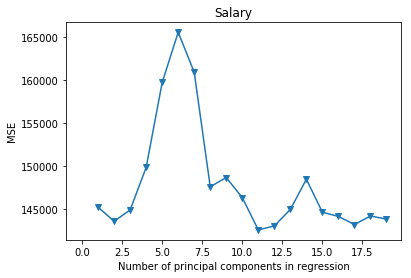

In [190]:
# n = len(X_train)

# 10-fold CV, with shuffle
kf_10 = KFold(n_splits=10, shuffle=True, random_state=1)
mse = []

for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i)
    score = cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='mean_squared_error').mean()
    mse.append(-score)

# Plot results
plt.plot(np.arange(1, 20), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1)


In [191]:
# Mean Squared Error on test set

pls = PLSRegression(n_components=2)
pls.fit(scale(X_train), y_train)
mean_squared_error(y_test, pls.predict(scale(X_test)))

PLSRegression(copy=True, max_iter=500, n_components=2, scale=True, tol=1e-06)

104838.51042760802